In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add lats and lngs to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

          

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | lund
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | soyo
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | sorsogon
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | micheweni
Processing Record 15 of Set 1 | port moresby
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | kudahuvadhoo
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | baker city
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | pocone
Processing Record 23 of Set 1 | barrow
Proces

Processing Record 39 of Set 4 | slanic-moldova
Processing Record 40 of Set 4 | vaitape
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | vao
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | mahibadhoo
Processing Record 45 of Set 4 | bose
Processing Record 46 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 47 of Set 4 | zhangye
Processing Record 48 of Set 4 | chokurdakh
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | abu samrah
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | dig
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | moranbah
Processing Record 5 of Set 5 | saint anthony
Processing Record 6 of Set 5 | dharan
Processing Record 7 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | marsh harbour
Processing Record 10 of Set 5 | hobyo
Processing Record 11 of Set 5 

Processing Record 30 of Set 8 | yeppoon
Processing Record 31 of Set 8 | juneau
Processing Record 32 of Set 8 | nola
Processing Record 33 of Set 8 | igarka
Processing Record 34 of Set 8 | bozeman
Processing Record 35 of Set 8 | puntarenas
Processing Record 36 of Set 8 | luwuk
Processing Record 37 of Set 8 | ozinki
Processing Record 38 of Set 8 | enshi
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | terra nova
Processing Record 41 of Set 8 | hohhot
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 | corinto
Processing Record 44 of Set 8 | taseyevo
Processing Record 45 of Set 8 | tonneins
Processing Record 46 of Set 8 | bababe
City not found. Skipping...
Processing Record 47 of Set 8 | colac
Processing Record 48 of Set 8 | toyooka
Processing Record 49 of Set 8 | visnes
Processing Record 50 of Set 8 | brae
Processing Record 1 of Set 9 | kyra
Processing Record 2 of Set 9 | malakal
Processing Record 3 of Set 9 | san isidro
Processing Record 4 of

Processing Record 20 of Set 12 | krapina
Processing Record 21 of Set 12 | jomalig
City not found. Skipping...
Processing Record 22 of Set 12 | trincomalee
Processing Record 23 of Set 12 | amalapuram
Processing Record 24 of Set 12 | tinskoy
Processing Record 25 of Set 12 | hanzhong
Processing Record 26 of Set 12 | saurimo
Processing Record 27 of Set 12 | barcelos
Processing Record 28 of Set 12 | tashtagol
Processing Record 29 of Set 12 | denpasar
Processing Record 30 of Set 12 | prince george
Processing Record 31 of Set 12 | adwa
Processing Record 32 of Set 12 | guadalupe y calvo
Processing Record 33 of Set 12 | beyneu
Processing Record 34 of Set 12 | anuradhapura
Processing Record 35 of Set 12 | mbala
Processing Record 36 of Set 12 | lazaro cardenas
Processing Record 37 of Set 12 | fougeres
Processing Record 38 of Set 12 | muravlenko
Processing Record 39 of Set 12 | kimamba
Processing Record 40 of Set 12 | fortuna
Processing Record 41 of Set 12 | linchuan
City not found. Skipping...
Pr

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.10,-113.58,75.00,40,1,3.36,US,2020-11-03 19:05:54
1,Lund,55.71,13.19,50.00,81,90,10.29,SE,2020-11-03 19:02:20
2,Castro,-24.79,-50.01,71.01,41,66,3.94,BR,2020-11-03 19:05:55
3,Atuona,-9.80,-139.03,77.85,71,0,18.05,PF,2020-11-03 19:05:55
4,Saskylakh,71.92,114.08,-1.32,92,95,3.85,RU,2020-11-03 19:05:56
5,Vardo,70.37,31.11,37.40,73,0,24.16,NO,2020-11-03 19:03:06
6,Kapaa,22.08,-159.32,80.60,78,40,11.41,US,2020-11-03 19:05:56
7,Esperance,-33.87,121.90,51.80,93,0,3.36,AU,2020-11-03 19:05:57
8,Cape Town,-33.93,18.42,68.00,88,20,16.11,ZA,2020-11-03 19:02:48
9,Soyo,-6.13,12.37,79.21,84,39,9.66,AO,2020-11-03 19:05:57


In [9]:
#reorder columns
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2020-11-03 19:05:54,37.10,-113.58,75.00,40,1,3.36
1,Lund,SE,2020-11-03 19:02:20,55.71,13.19,50.00,81,90,10.29
2,Castro,BR,2020-11-03 19:05:55,-24.79,-50.01,71.01,41,66,3.94
3,Atuona,PF,2020-11-03 19:05:55,-9.80,-139.03,77.85,71,0,18.05
4,Saskylakh,RU,2020-11-03 19:05:56,71.92,114.08,-1.32,92,95,3.85


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

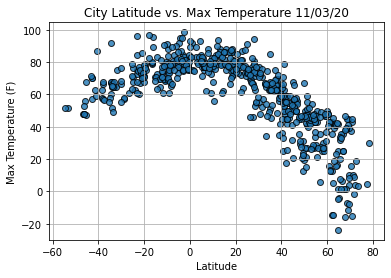

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

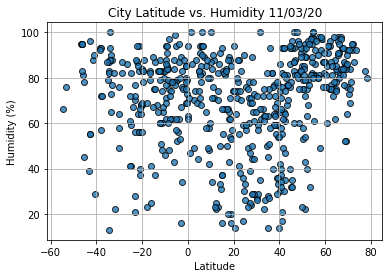

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

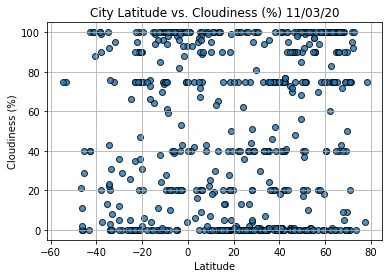

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

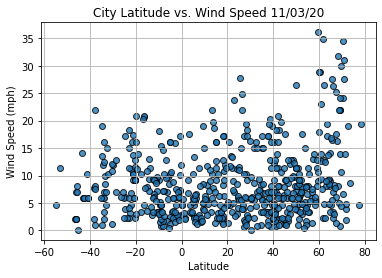

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                    Micheweni
Country                        TZ
Date          2020-11-03 19:05:58
Lat                         -4.97
Lng                         39.83
Max Temp                    78.19
Humidity                       79
Cloudiness                      0
Wind Speed                  10.33
Name: 13, dtype: object

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

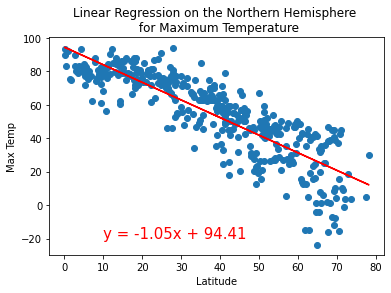

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

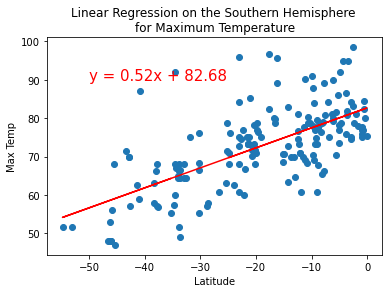

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

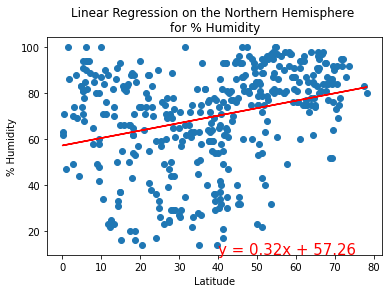

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

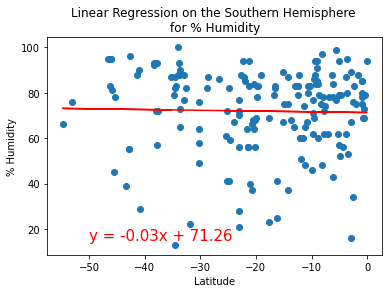

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

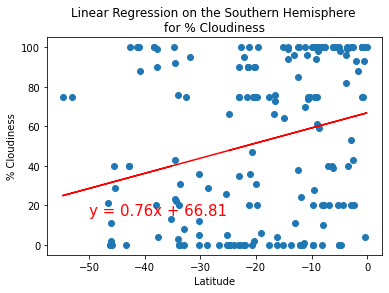

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

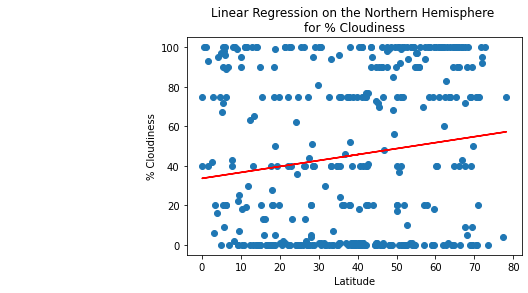

In [43]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

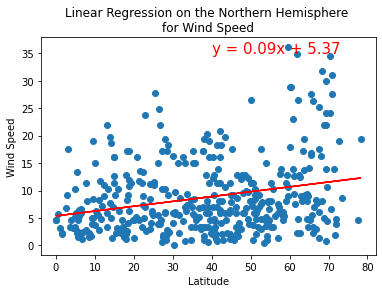

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

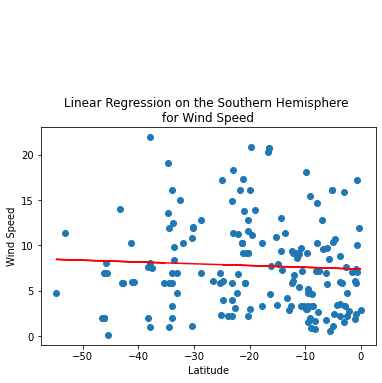

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))